In [1]:
# Initialization
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

hyper_parameter = 0.0001

In [2]:
df = pd.read_csv("sample.csv")

df.columns = ["feature", "target"]

In [3]:
df.head()

,feature,target
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [4]:
train_ratio = int(0.75 * len(df))

In [5]:
y_train = df["target"].iloc[:train_ratio]
y_train

0      68.777596
1      62.562382
2      71.546632
3      87.230925
4      78.211518
         ...    
69     50.392670
70     63.642399
71     72.247251
72     57.812513
73    104.257102
Name: target, Length: 74, dtype: float64

In [6]:
x_train = df["feature"].iloc[:train_ratio]
x_train

0     53.426804
1     61.530358
2     47.475640
3     59.813208
4     55.142188
        ...    
69    31.588117
70    53.660932
71    46.682229
72    43.107820
73    70.346076
Name: feature, Length: 74, dtype: float64

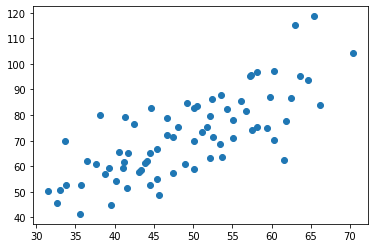

In [7]:
plt.scatter(x_train, y_train)
plt.show()

using following formulas to calculate 

Slope and constant for the line:

For m:

- m = m - alpha * (-2/n) * sum(x * (ypred - yobs))
- c = c - alpha * (-2/n) * sum(ypred - yobs)

In [8]:
from functools import reduce

def getRegressionLine(x_train, y_train, alpha, iterations):
    n = x_train.shape[0]
    m = 0
    c = 0
    for i in range(0, iterations):
        y = m*x_train + c
        loss = y_train - y
        m = m - alpha * (-2/n) * sum(x_train * (loss))
        c = c - alpha * (-2/n) * sum(loss)
    return (m, c)

In [9]:
m,c = getRegressionLine(x_train, y_train, hyper_parameter, 1000)

In [10]:
print(f"Equation is: Y = {m}*X + {c}")

Equation is: Y = 1.4570286955465837*X + 0.08132407563172861


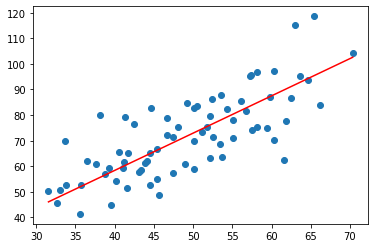

In [11]:
results = m*x_train+c

plt.scatter(x_train, y_train)
plt.plot([min(x_train), max(x_train)], [min(results), max(results)], color='red')

## TESTING

In [12]:
y_test = df["target"].iloc[train_ratio+1:]

y_test

75     91.486778
76     55.231661
77     79.550437
78     44.847124
79     80.207523
80     83.142750
81     55.723489
82     77.634183
83     99.051415
84     79.120646
85     69.588898
86     69.510503
87     73.687564
88     61.366905
89     67.170656
90     85.668203
91    114.853871
92     90.123572
93     97.919821
94     81.536991
95     72.111832
96     85.232007
97     66.224958
98     53.454394
Name: target, dtype: float64

In [13]:
x_test = df["feature"].iloc[train_ratio+1:]

x_test

75    57.504533
76    36.930077
77    55.805733
78    38.954769
79    56.901215
80    56.868901
81    34.333125
82    59.049741
83    57.788224
84    54.282329
85    51.088720
86    50.282836
87    44.211742
88    38.005488
89    32.940480
90    53.691640
91    68.765734
92    46.230966
93    68.319361
94    50.030174
95    49.239765
96    50.039576
97    48.149859
98    25.128485
Name: feature, dtype: float64

In [14]:
predictions = m*x_test + c

In [15]:
predictions

75     83.867079
76     53.889505
77     81.391879
78     56.839540
79     82.988027
80     82.940944
81     50.105672
82     86.118491
83     84.280425
84     79.172235
85     74.519055
86     73.344860
87     64.499100
88     55.456411
89     48.076549
90     78.311584
91    100.274972
92     67.441169
93     99.624593
94     72.976724
95     71.825075
96     72.990422
97     70.237050
98     36.694247
Name: feature, dtype: float64

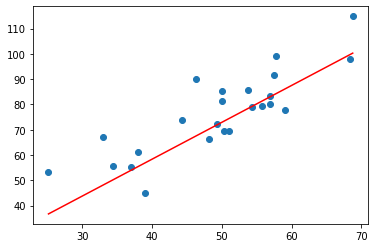

In [16]:
plt.scatter(x_test, y_test)
plt.plot([min(x_test), max(x_test)], [min(predictions), max(predictions)], color='red')

## ACCURACY

In [17]:
from sklearn.metrics import r2_score

print(r2_score(y_test, predictions))

0.6106992261997403


In [18]:
from sklearn.metrics import r2_score

print(r2_score(y_train, results))

0.5671223516484414
